# Q2

In [73]:
import cv2 # just for reading the image
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import copy

read image "q2.png"

In [74]:
img = cv2.imread("images/q2.png")

plot the image

در ابتدا نقطه ی انتخابی خود را می توانیم با کد زیر که با یک لوزی نشان داده می شود را ببینیم. که به شرح زیر است:

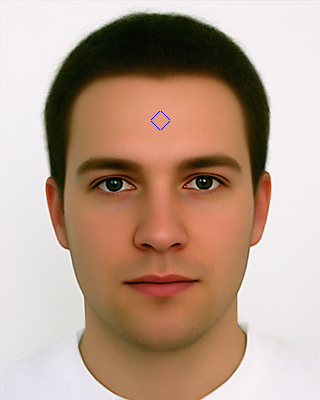

(400, 320, 3)


In [75]:
xx = 120
yy = 160
for i in range(10):
  for j in range(10):
    if(i + j == 10):
      img[xx + i, yy + j] = (255, 0, 0)
      img[xx + i, yy - j] = (255, 0, 0)
      img[xx - i, yy + j] = (255, 0, 0)
      img[xx - i, yy - j] = (255, 0, 0)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img.shape)


In [76]:
# segmented_image_4 = segment(img,seed_point,threshold)
# segmented_image_8 = segment(img,seed_point,threshold,1)

plot the results and compare them

در این قسمت کدی که زدم چندین نقطه را در استک قرار می دهد و هر کدام را در آن قرار می دهد و سپس به سراغ نقاط دیگر می رود.

In [77]:
def segment1(image, seed_points, threshold, neighbor_mode=0):

    segmented_image = image.copy()
    rows, cols, _ = image.shape
    visited = np.zeros((rows, cols), dtype=bool)

    if neighbor_mode == 0:
        offsets = [(0, -1), (-1, 0), (0, 1), (1, 0)]  # 4-connectivity
    else:
        offsets = [(0, -1), (-1, 0), (0, 1), (1, 0),
                   (-1, -1), (-1, 1), (1, -1), (1, 1)]  # 8-connectivity
    queue = []

    for seed_point in seed_points:
      queue.append(seed_point)
    while queue:
        current_point = queue.pop(0)
        x, y = current_point
        if visited[x, y]:
            continue
        visited[x, y] = True
        for seed_point in seed_points:
            seed_color = image[seed_point].astype(np.float32)

            for offset in offsets:
                nx, ny = x + offset[0], y + offset[1]
                if 0 <= nx < rows and 0 <= ny < cols:
                    if not visited[nx, ny]:
                        one =  np.abs(image[nx, ny] - seed_color)[0]
                        two =  np.abs(image[nx, ny] - seed_color)[1]
                        three= np.abs(image[nx, ny] - seed_color)[2]
                        if one + two + three < 3 * threshold:
                            queue.append((nx, ny))
                            segmented_image[nx, ny] = (255, 0, 0)

    return segmented_image

image = cv2.imread("images/q2.png")


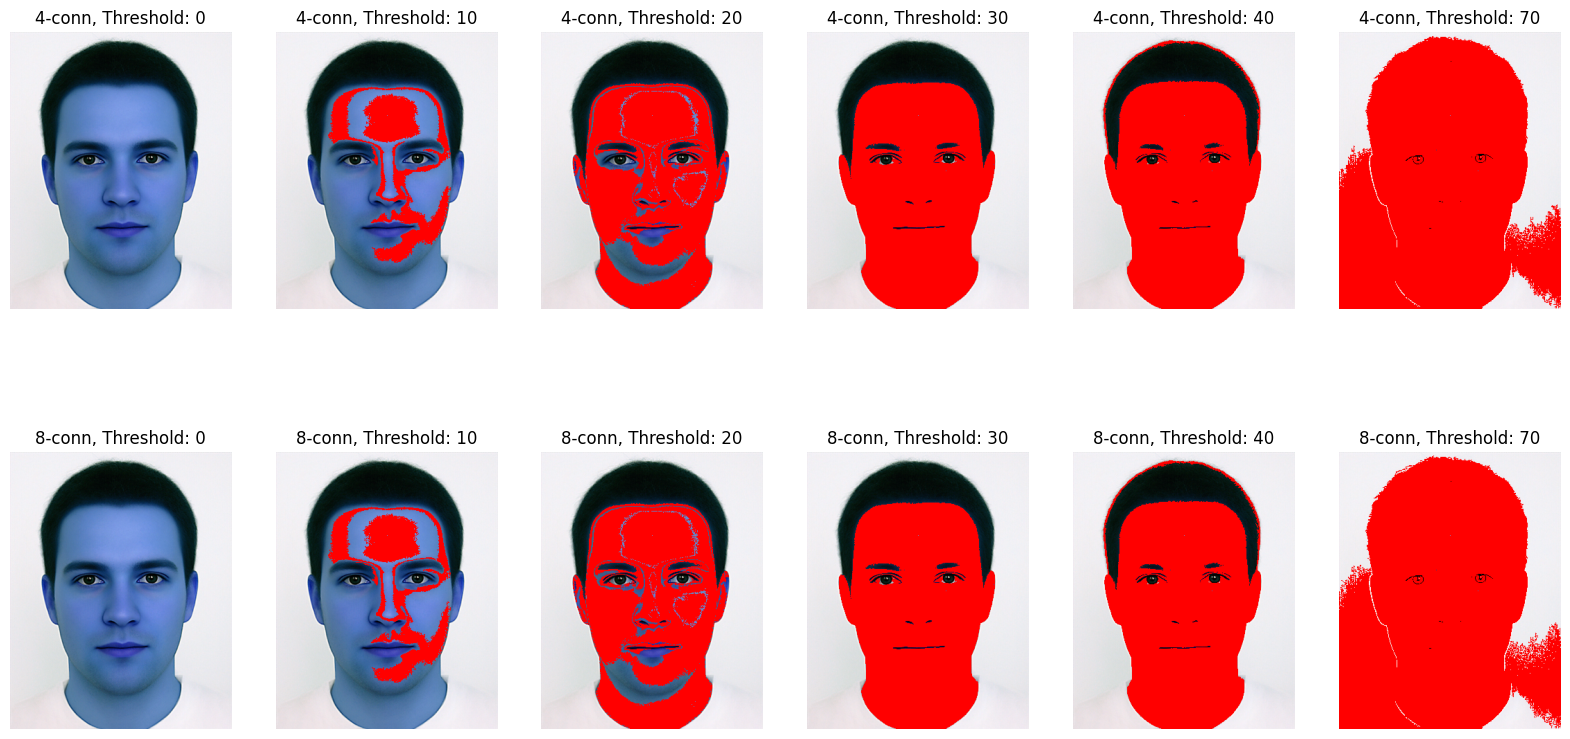

In [78]:
seed_point = [(200, 200), (170, 140), (120, 160)]
threshold =[0, 10, 20, 30, 40, 70]

fig, axes = plt.subplots(2, len(threshold), figsize=(20, 10))
for i in range(len(threshold)):

    segmented_image_4 = segment1(image,seed_point,threshold[i])
    segmented_image_8 = segment1(image,seed_point,threshold[i],1)

    axes[0, i].imshow(segmented_image_4)
    axes[0, i].set_title(f'4-conn, Threshold: {threshold[i]}')
    axes[0, i].axis('off')
    axes[1, i].imshow(segmented_image_8)
    axes[1, i].set_title(f'8-conn, Threshold: {threshold[i]}')
    axes[1, i].axis('off')



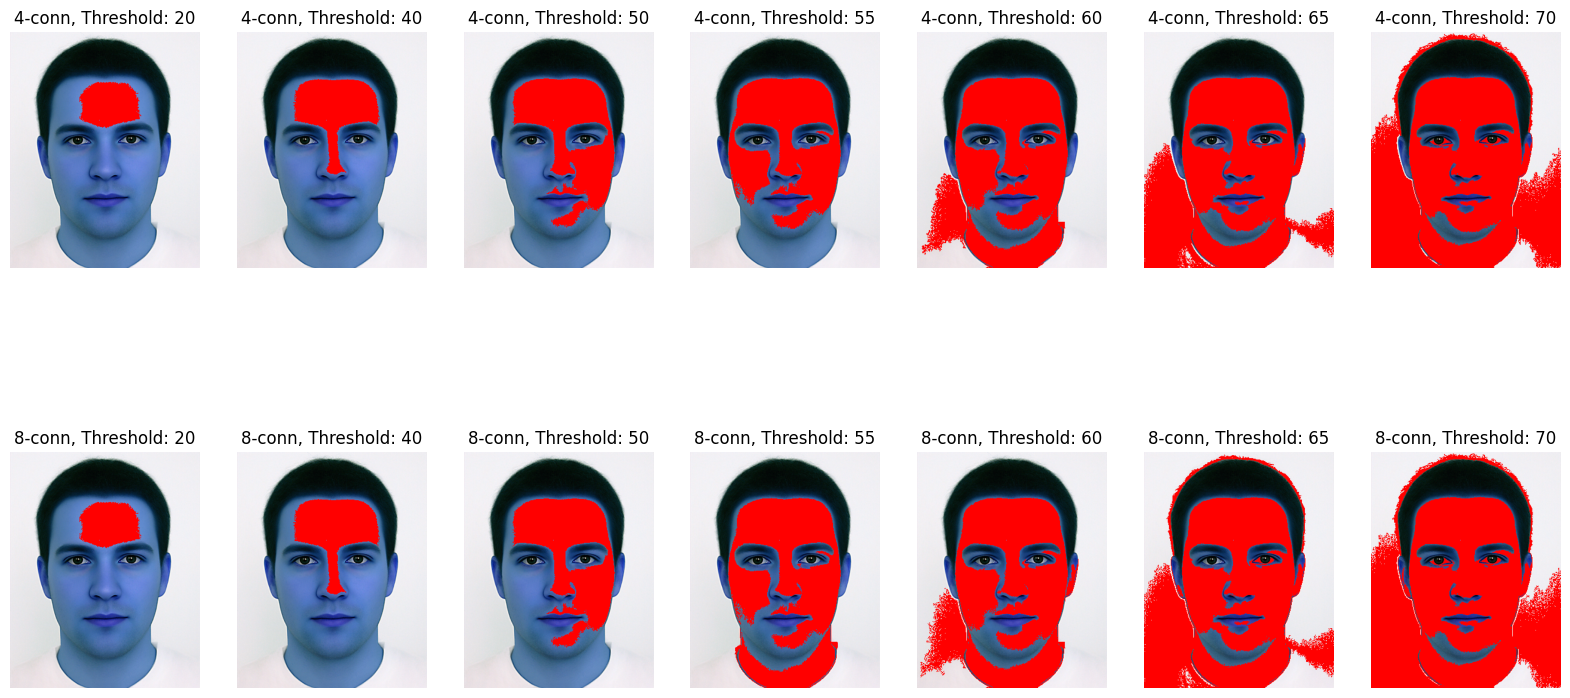

In [79]:
seed_point = [(150, 150)]
threshold =[20, 40, 50, 55, 60, 65, 70]

fig, axes = plt.subplots(2, len(threshold), figsize=(20, 10))
for i in range(len(threshold)):

    segmented_image_4 = segment1(image,seed_point,threshold[i])
    segmented_image_8 = segment1(image,seed_point,threshold[i],1)

    axes[0, i].imshow(segmented_image_4)
    axes[0, i].set_title(f'4-conn, Threshold: {threshold[i]}')
    axes[0, i].axis('off')
    axes[1, i].imshow(segmented_image_8)
    axes[1, i].set_title(f'8-conn, Threshold: {threshold[i]}')
    axes[1, i].axis('off')



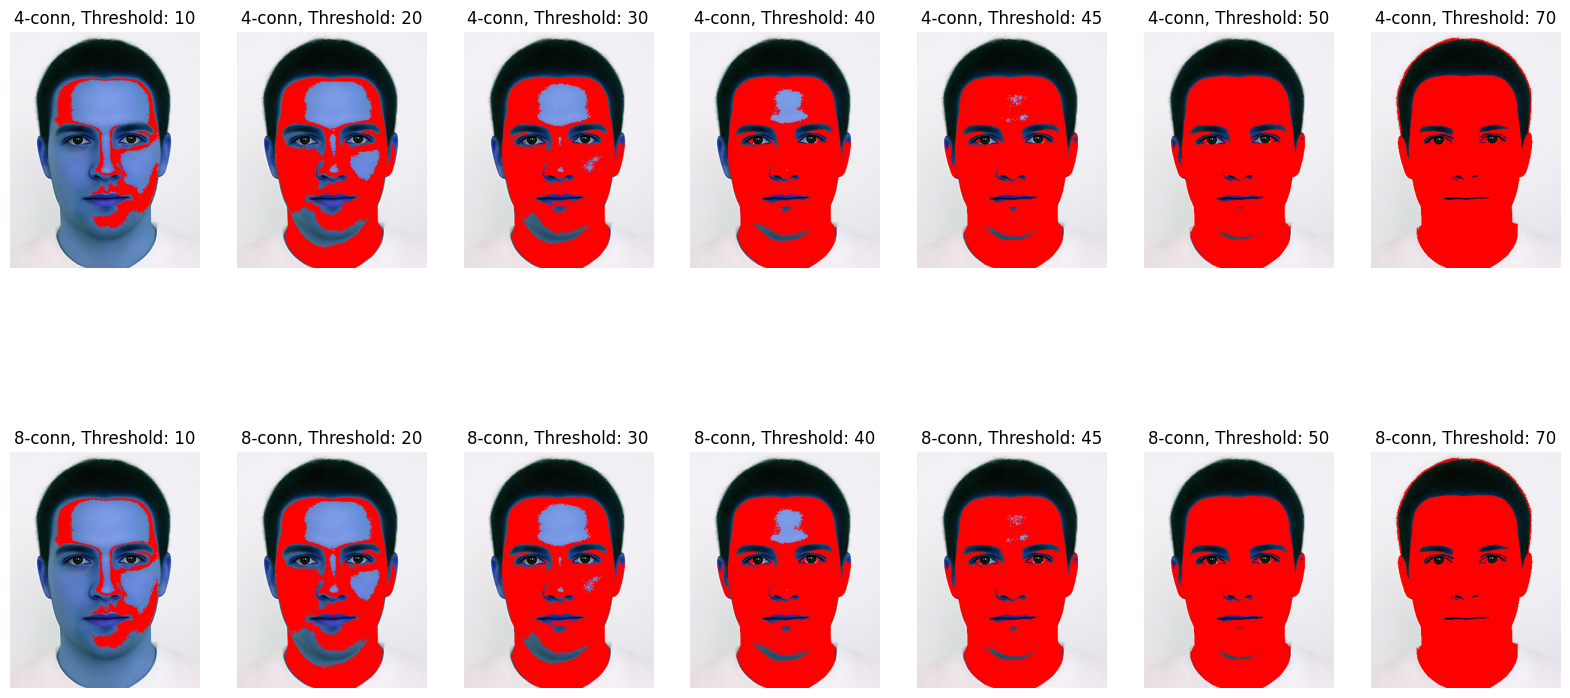

In [80]:
seed_point = [(200, 200)]
threshold =[10, 20, 30, 40, 45, 50, 70]

fig, axes = plt.subplots(2, len(threshold), figsize=(20, 10))
for i in range(len(threshold)):

    segmented_image_4 = segment1(image,seed_point,threshold[i])
    segmented_image_8 = segment1(image,seed_point,threshold[i],1)

    axes[0, i].imshow(segmented_image_4)
    axes[0, i].set_title(f'4-conn, Threshold: {threshold[i]}')
    axes[0, i].axis('off')
    axes[1, i].imshow(segmented_image_8)
    axes[1, i].set_title(f'8-conn, Threshold: {threshold[i]}')
    axes[1, i].axis('off')



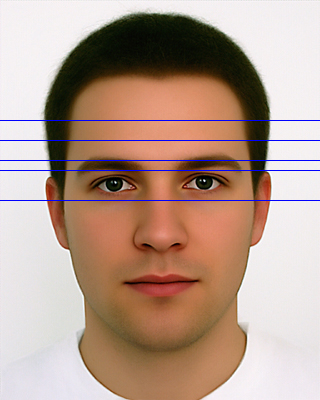

its threshold is 0


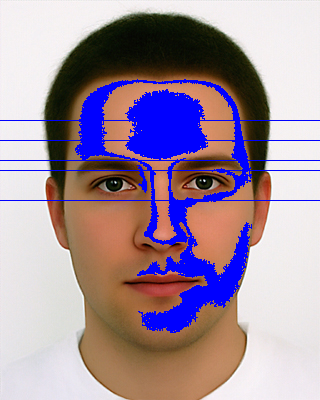

its threshold is 10


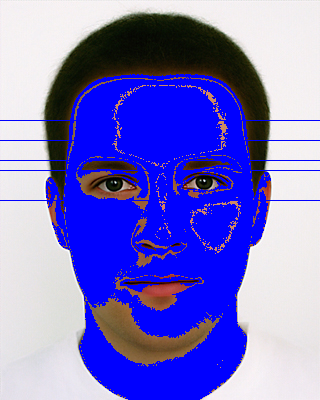

its threshold is 20


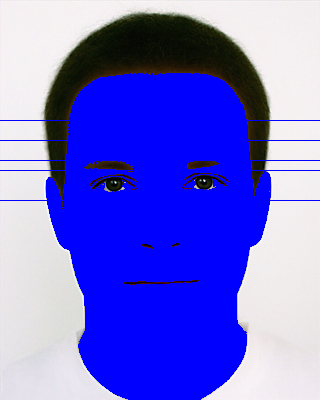

its threshold is 30


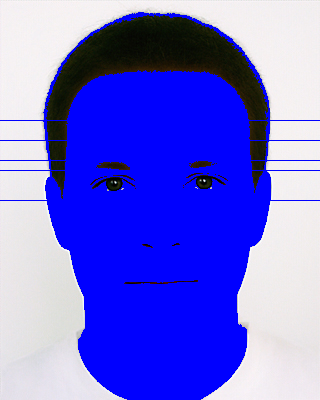

its threshold is 40


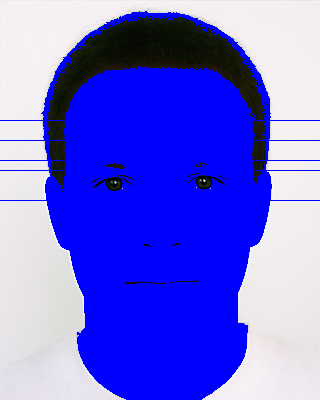

its threshold is 50


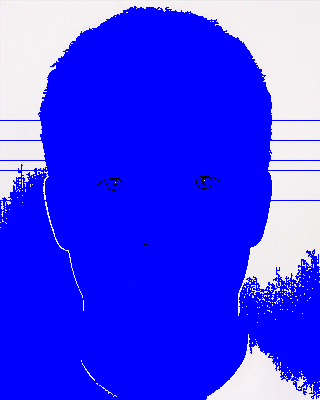

its threshold is 70


In [81]:

seed_point = [(200, 200), (170, 140), (120, 160)]
threshold =[0, 10, 20, 30, 40, 50, 70]

for i in range(len(threshold)):
  segmented_image = segment1(image, seed_point, threshold[i], 0)
  segmented_image[seed_point] = (255, 0, 0)

  cv2_imshow(segmented_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  print(f"its threshold is {threshold[i]}")